In [1]:
import torch
import numpy as np
import tensorflow as tf
from abc import ABC, abstractmethod
from stlcg import *
from stlviz import make_stl_graph

In [2]:
x = torch.randn([1, 10, 1], requires_grad=False)
w = torch.randn([1, 10, 1], requires_grad=False)
c = torch.tensor(1.0, dtype=torch.float, requires_grad=True)
d = torch.tensor(-1.0, dtype=torch.float, requires_grad=True)

In [3]:
GThan = GreaterThan(name="w", c='d')
print(GThan)
LThan = LessThan(name="x", c='c')
print(LThan)
Eq = Equal(name="x", c="c")
print(Eq)
An = And(subformula1=LThan, subformula2=GThan)
print(Eq)
Alw = Always(subformula=An)
print(Alw)
Ev = Eventually(subformula=An)
print(Alw)

w >= d
x <= c
x = c
x = c
◻ [0, inf]( (x <= c) ∧ (w >= d) )
◻ [0, inf]( (x <= c) ∧ (w >= d) )


In [4]:
ψ = LThan
ϕ = GThan
π = Eventually()
δ = Always()
x

tensor([[[-1.5927],
         [-1.1749],
         [-3.0605],
         [ 1.0519],
         [ 0.9368],
         [-1.3302],
         [-2.7669],
         [-0.5763],
         [ 0.1860],
         [ 0.8208]]])

In [34]:
?minish

In [39]:
a = ψ(x, c)
b = ϕ(x[:,1:,:], c)

In [124]:
i = 1
minish(torch.stack([δ(ϕ(x[:,i:,:], c)), lhs[:,i:,:,1]], dim=-1), dim=-1, scale=0).shape

torch.Size([1, 9, 1, 1])

In [121]:
v = torch.ones([1, 9, 1])*1000

In [ ]:
for i in range(1,10):
    

In [119]:
[minish(torch.stack([δ(ϕ(x[:,i:,:], c)), lhs[:,i:,:,1]], dim=-1), dim=-1, scale=0) for i in range(1,10)]

[tensor([[[[-2.1749]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]]]], grad_fn=<MinBackward0>), tensor([[[[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]],
 
          [[-4.0605]]]], grad_fn=<MinBackward0>), tensor([[[[ 0.0519]],
 
          [[-0.0632]],
 
          [[-2.3302]],
 
          [[-3.7669]],
 
          [[-3.7669]],
 
          [[-3.7669]],
 
          [[-3.7669]]]], grad_fn=<MinBackward0>), tensor([[[[-0.0632]],
 
          [[-2.3302]],
 
          [[-3.7669]],
 
          [[-3.7669]],
 
          [[-3.7669]],
 
          [[-3.7669]]]], grad_fn=<MinBackward0>), tensor([[[[-2.3302]],
 
          [[-3.7669]],
 
          [[-3.7669]],
 
          [[-3.7669]],
 
          [[-3.7669]]]], grad_fn=<MinBackward0>), tens

In [104]:
lhs = a[:,:-1,:].permute(0, 2, 1).unsqueeze(1).repeat(1,10,1,1)

In [108]:
lhs[:,2:,:,1].shape

torch.Size([1, 8, 1])

In [63]:
torch.stack([a[:,:-1,:], torch.cat([minish(ϕ(x[:,i:,:], c), scale=0) for i in range(1,10)], dim=1)], dim=-1).shape

torch.Size([1, 9, 1, 2])

In [ ]:
class Until(STL_Formula):
    '''
    ϕ U ψ
    max[t'\in[t, t+k]] (min (ρ(t':t+k, ψ), min[t''\in[t:t') ρ(t'':t, ϕ)]) )
    '''
    def __init__(self, subformula1='ϕ', subformula2='ψ'):
        
        super(LessThan, self).__init__()
        self.subformula1 = subformula1
        self.subformula2 = subformula2

    def robustness_trace(self, x, c, scale=1):
        if scale == 1:
            return c - x
        return (c - x)*scale

    def robustness(self, x, c, time=-1, scale=1):
        return self.robustness_trace(x, c, scale)[:,time,:].unsqueeze(1)

    def eval_trace(self, x, c, scale=1):
        return self.robustness_trace(x, c, scale) > 0

    def eval(self, x, c, time=-1, scale=1):
        return self.eval_trace(x, c, scale)[:,time,:].unsqueeze(1)

    def _next_function(self):
        # next function is actually input (traverses the graph backwards)
        return [self.name, self.c]  
    
    def forward(self, x, c, scale=1):
        return self.robustness_trace(x, c, scale)

    def __str__(self):
        return self.name + " <= " + str(self.c)




In [54]:
x[:,9:,:]

tensor([[[0.8208]]])

In [46]:
x[:,-1:,:]

tensor([[[0.8208]]])

In [43]:

b

tensor([[[-2.1749],
         [-4.0605],
         [ 0.0519],
         [-0.0632],
         [-2.3302],
         [-3.7669],
         [-1.5763],
         [-0.8140],
         [-0.1792]]], grad_fn=<SubBackward0>)

In [11]:
minish = Minish()

In [8]:
j = 3
b = ϕ(x[:,j:], d)
δ(b)

tensor([[[ 2.0519],
         [ 1.9368],
         [-0.3302],
         [-1.7669],
         [-1.7669],
         [-1.7669],
         [-1.7669]]], grad_fn=<CatBackward>)

In [9]:
GThan._next_function()

['w', 'd']

In [ ]:
# [batch_size, t, x_dim, t_prime]

In [12]:
p = []
for j in range(1, x.shape[1]):
    p.append(minish(ϕ(x[:,j:], d), scale=0))


In [13]:
torch.cat(p, dim=1)

tensor([[[-2.0605],
         [-2.0605],
         [-1.7669],
         [-1.7669],
         [-1.7669],
         [-1.7669],
         [ 0.4237],
         [ 1.1860],
         [ 1.8208]]], grad_fn=<CatBackward>)

In [14]:
GThan = GreaterThan(name="w", c='d')
print(GThan)
LThan = LessThan(name="x", c='c')
print(LThan)
Eq = Equal(name="x", c="c")
print(Eq)
An = And(subformula1=LThan, subformula2=GThan)
print(Eq)
Alw = Always(subformula=An)
print(Alw)


w >= d
x <= c
x = c
x = c
◻ [0, inf]( (x <= c) ∧ (w >= d) )


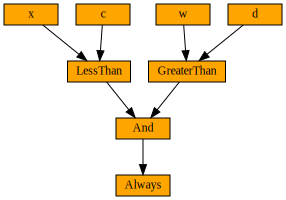

In [15]:
make_stl_graph(Alw)

In [ ]:
tf.

In [8]:
Alw.named_parameters

<bound method Module.named_parameters of Always(
  (subformula): And(
    (subformula1): LessThan()
    (subformula2): GreaterThan()
    (operation): Minish()
  )
  (operation): Minish()
)>

In [5]:
lhs = LThan.robustness_trace(x, c)
rhs = GThan.robustness_trace(w, d)
an = An.robustness_trace(lhs, rhs, scale = 10)
rt = Alw.robustness_trace(an, scale=0)

In [11]:
str(type(var).__name__)

'SqueezeBackward1'

In [17]:
str(None)

'None'

In [10]:
var = an.grad_fn
output_nodes = (var,) if not isinstance(var, tuple) else tuple(v.grad_fn for v in var)

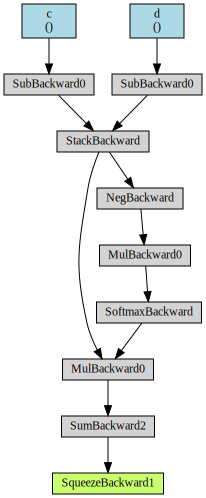

In [7]:
input_params = {'x': x, 'w': w, 'c': c, 'd': d}
make_dot(an, params = {**input_params, **dict(An.named_parameters())})

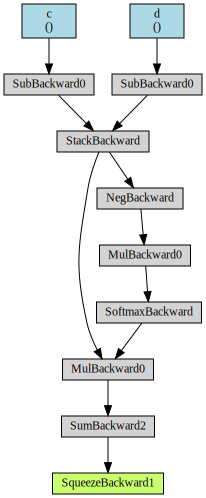

In [16]:
input_params = {'x': x, 'w': w, 'c': c, 'd': d}
make_dot(an, params = {**input_params, **dict(An.named_parameters())})

In [18]:
Alw = Always(subformula=LThan, interval=[4, 8])
print(Alw)

◻ [4, 8]( x <= c )


In [19]:
print(Negation(subformula=Alw))

¬(◻ [4, 8]( x <= c ))


In [22]:
print(And(subformula1=GThan, subformula2=LThan))

(x >= c) ∧ (x <= c)
